In [1]:
import sys
import os

# Add the path to the scripts folder to the system path
sys.path.append(os.path.abspath('../scripts'))

from backtesting import Backtester
import pandas as pd
import matplotlib.pyplot as plt


## Initialize the Backtester & Fetch Stock Data
### This cell initializes the backtester for a stock (e.g., AAPL) and fetches historical stock data.

In [2]:
# Initialize Backtester for AAPL stock
backtester = Backtester("AAPL", start="2020-01-01", end="2024-01-01")

# Display first few rows of fetched data
print("Fetching historical data...")
backtester.data.head()


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

⚠️ Warning: 'Adj Close' column not found. Using 'Close' instead.
Fetching historical data...


Price,Close,High,Low,Open,Volume,Adj Close,Returns
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,
2020-01-03,72.009109,72.771737,71.783954,71.941321,146322800,72.009109,-0.009722
2020-01-06,72.582909,72.621646,70.876075,71.127866,118387200,72.582909,0.007968
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000,72.241562,-0.004703
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200,73.403641,0.016086
2020-01-09,74.962784,75.156464,74.132368,74.384151,170108400,74.962784,0.021241


## Visualizing the Stock Price Data
### Plotting the stock price over time to understand price trends before applying strategies.

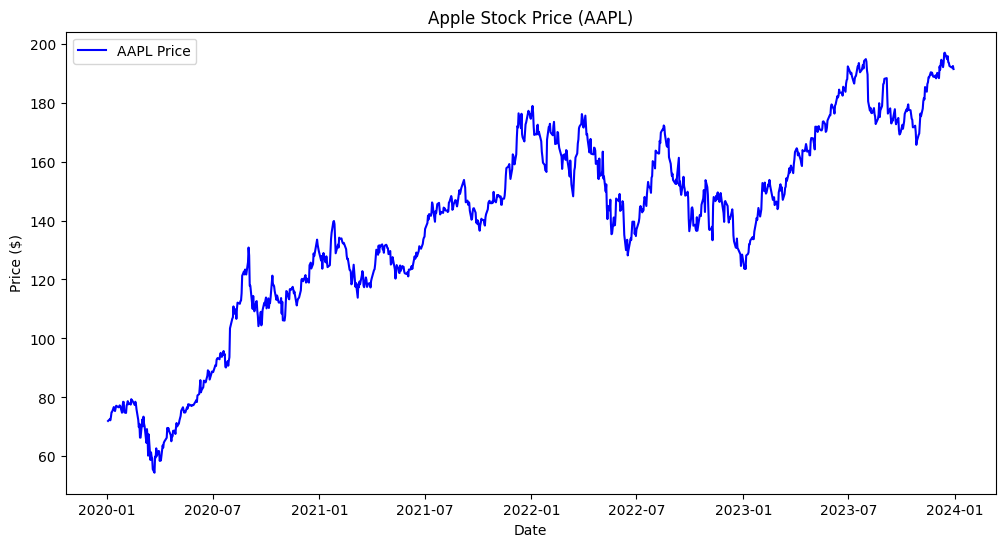

In [3]:
plt.figure(figsize=(12,6))
plt.plot(backtester.data.index, backtester.data["Adj Close"], label="AAPL Price", color="blue")
plt.title("Apple Stock Price (AAPL)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


## Running Individual Strategies


### Moving Average Crossover Strategy

Running Moving Average Crossover Strategy...


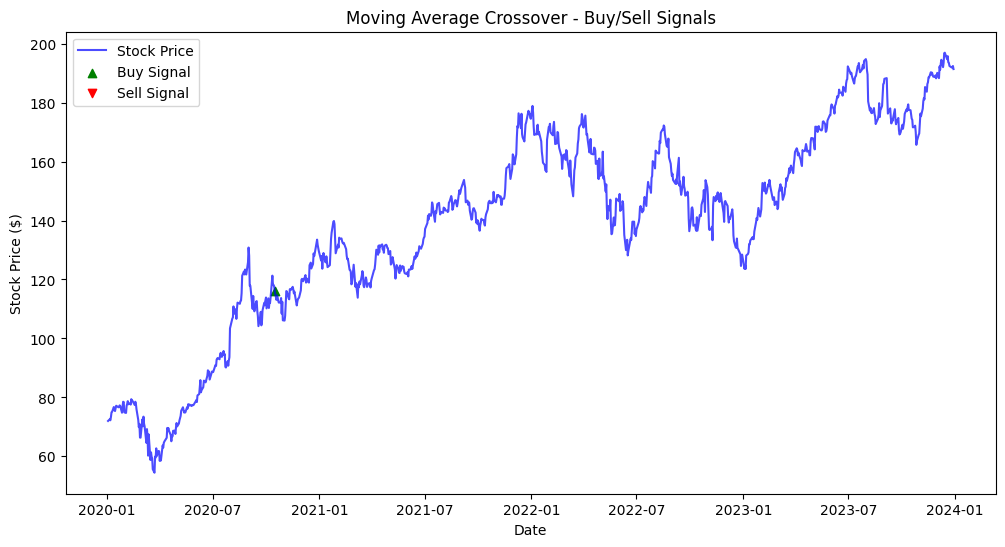

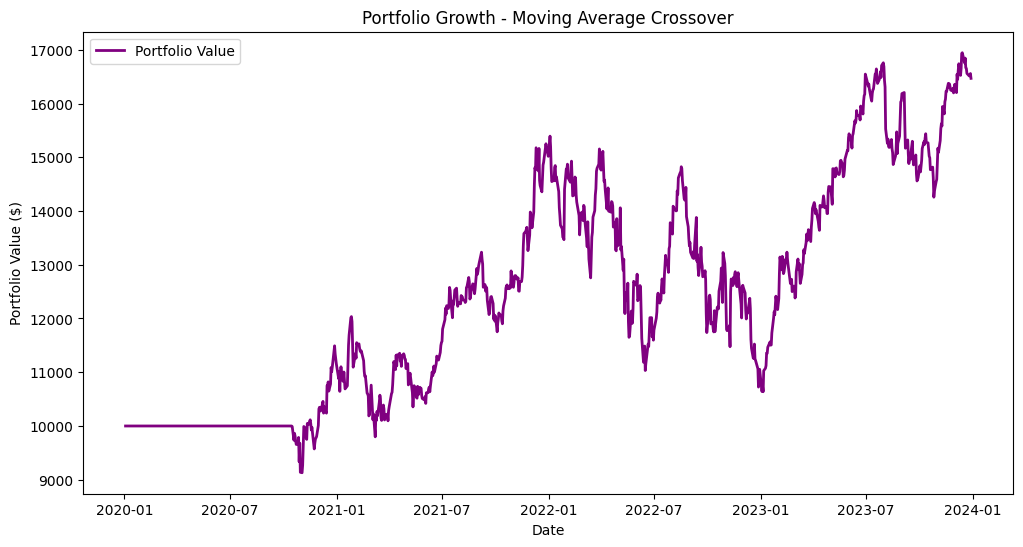

{'Strategy': 'Moving Average Crossover', 'Total Return': '64.68%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-30.89%', 'Win Rate': '0.00%', 'Total Trades': 1}


In [4]:
print("Running Moving Average Crossover Strategy...")
ma_results = backtester.moving_average_crossover()
print(ma_results)


### Explanation of Moving Average Crossover Strategy Results
→ The strategy achieved a 64.68% gain over the backtesting period.

Sharpe Ratio: 0.89
→ A Sharpe Ratio of 0.89 indicates a moderate risk-adjusted return. A higher value (>1) is preferable.

Max Drawdown: -30.89%
→ The largest drop from peak to trough was -30.89%, meaning the portfolio lost nearly a third of its value at its worst point.

Win Rate: 0.00%
→ The strategy only executed one trade, and it was not a profitable one.

Total Trades: 1
→ The strategy generated only one trade signal over the entire period, likely due to the slow reaction of long moving averages.

Running Moving Average Crossover Strategy...


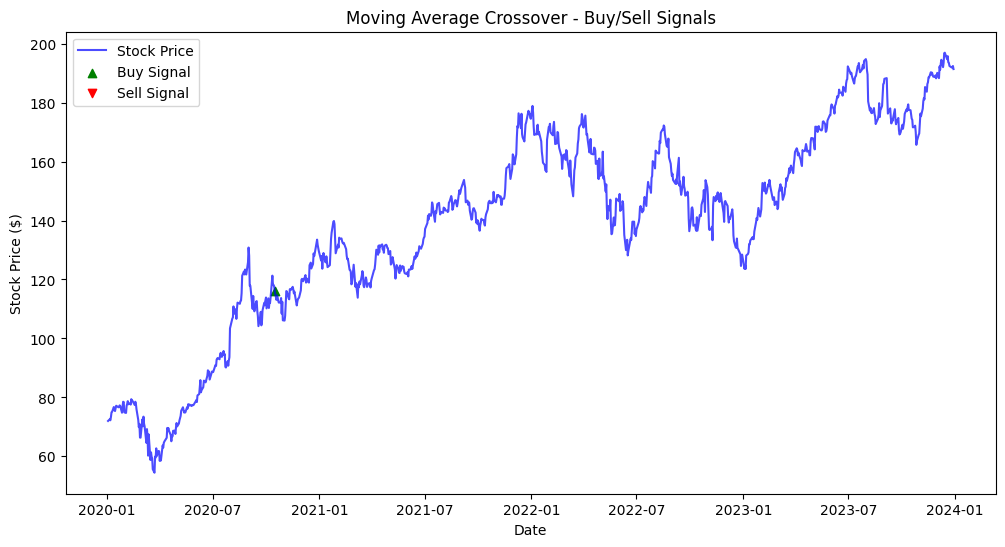

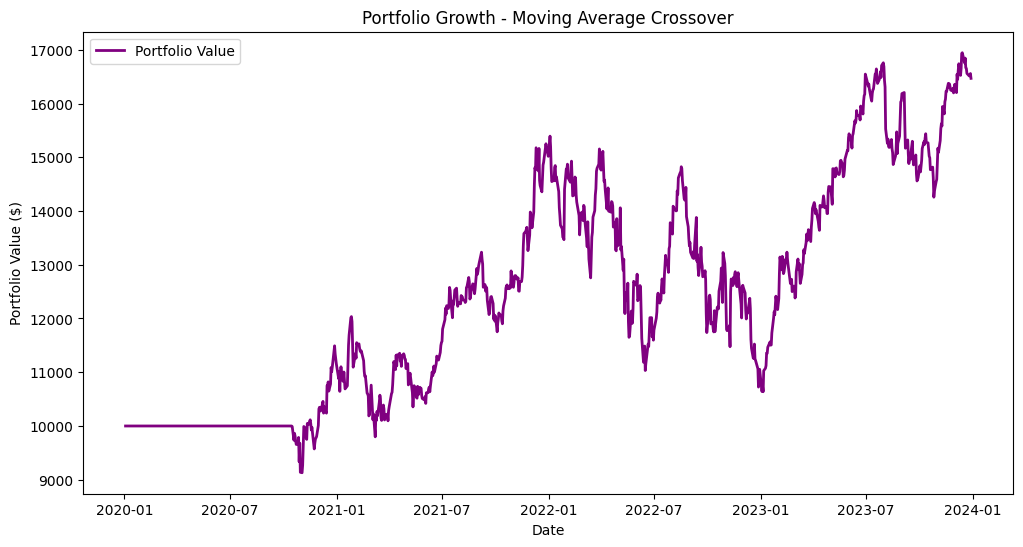

{'Strategy': 'Moving Average Crossover', 'Total Return': '64.68%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-30.89%', 'Win Rate': '0.00%', 'Total Trades': 1}


In [5]:
print("Running Moving Average Crossover Strategy...")
ma_results = backtester.moving_average_crossover()
print(ma_results)


### RSI Strategy

Running RSI Strategy...


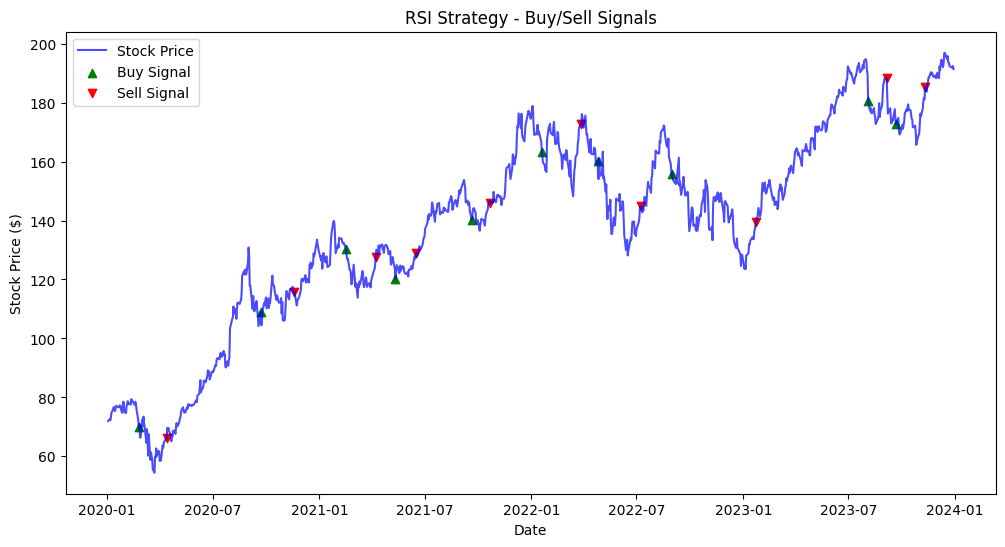

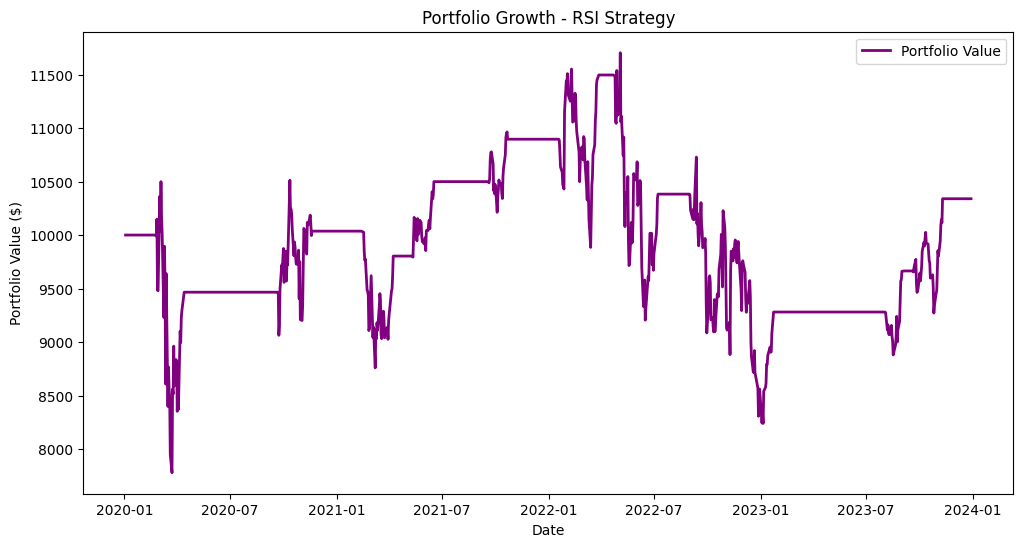

{'Strategy': 'RSI Strategy', 'Total Return': '3.39%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-29.59%', 'Win Rate': '60.00%', 'Total Trades': 10}


In [6]:
print("Running RSI Strategy...")
rsi_results = backtester.rsi_strategy()
print(rsi_results)


## Explanation of RSI Strategy Results

Total Return: 3.39%
→ The strategy resulted in a modest gain of 3.39% over the backtesting period.

Sharpe Ratio: 0.89
→ A Sharpe Ratio of 0.89 suggests a moderate risk-adjusted return but not strong enough for a high-confidence strategy.

Max Drawdown: -29.59%
→ The portfolio experienced a significant decline of 29.59% from its peak, highlighting potential risk exposure.

Win Rate: 60.00%
→ 60% of the trades were profitable, meaning the strategy had a higher probability of winning trades than losing ones.

Total Trades: 10
→ The strategy executed 10 trades over four years, showing it was more active than the Moving Average Crossover but still relatively conservative.

###  Bollinger Bands Strategy

Running Bollinger Bands Strategy...


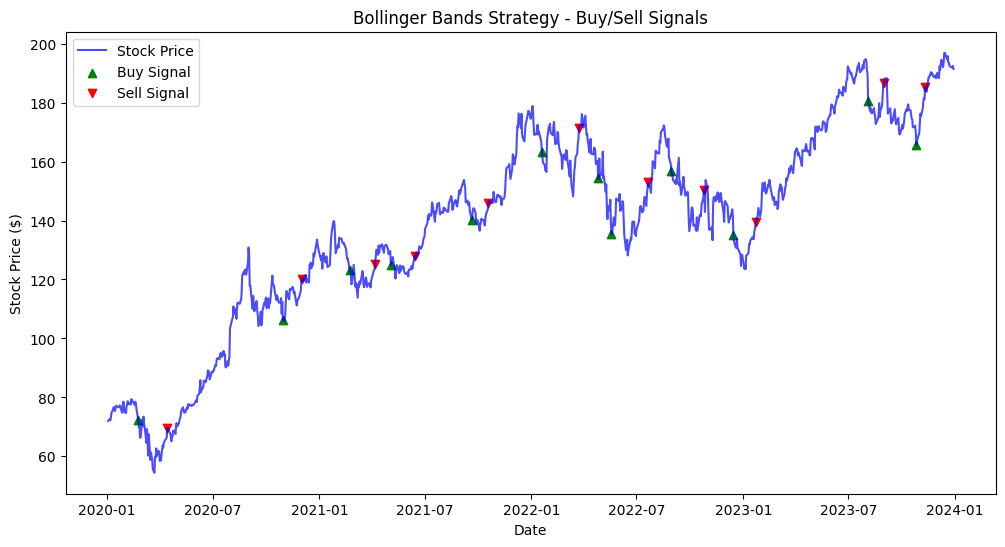

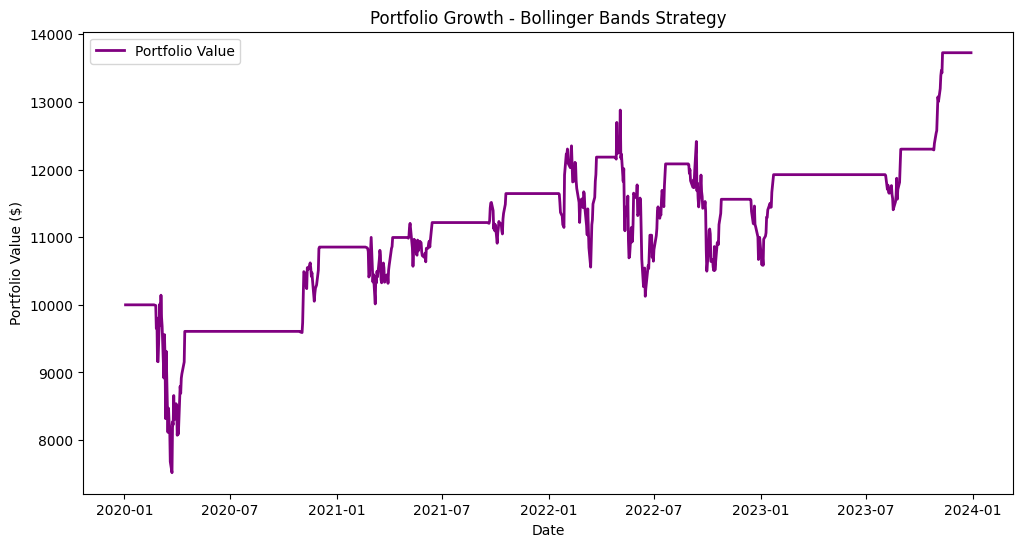

{'Strategy': 'Bollinger Bands Strategy', 'Total Return': '37.27%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-25.88%', 'Win Rate': '75.00%', 'Total Trades': 12}


In [7]:
print("Running Bollinger Bands Strategy...")
bb_results = backtester.bollinger_bands()
print(bb_results)


### MACD Crossover Strategy

Running MACD Crossover Strategy...


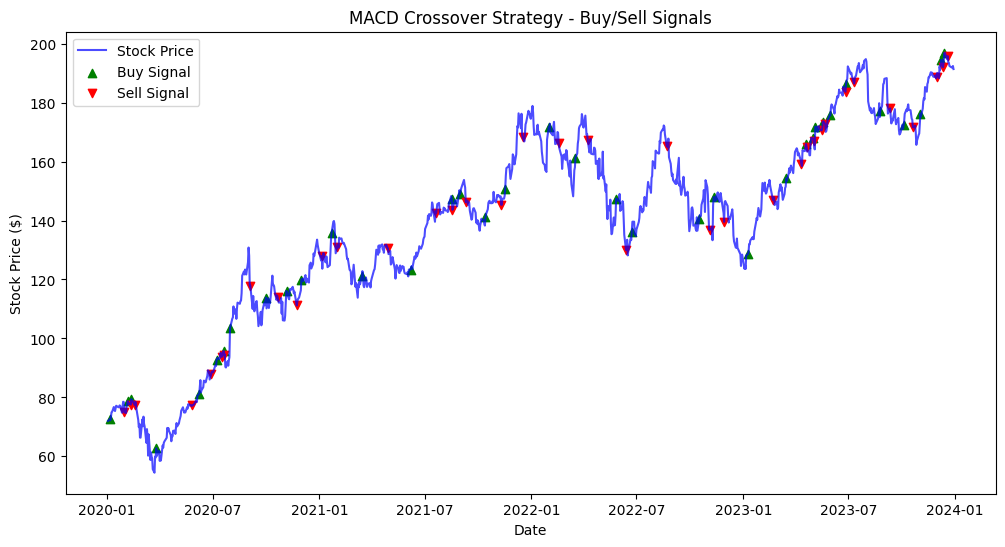

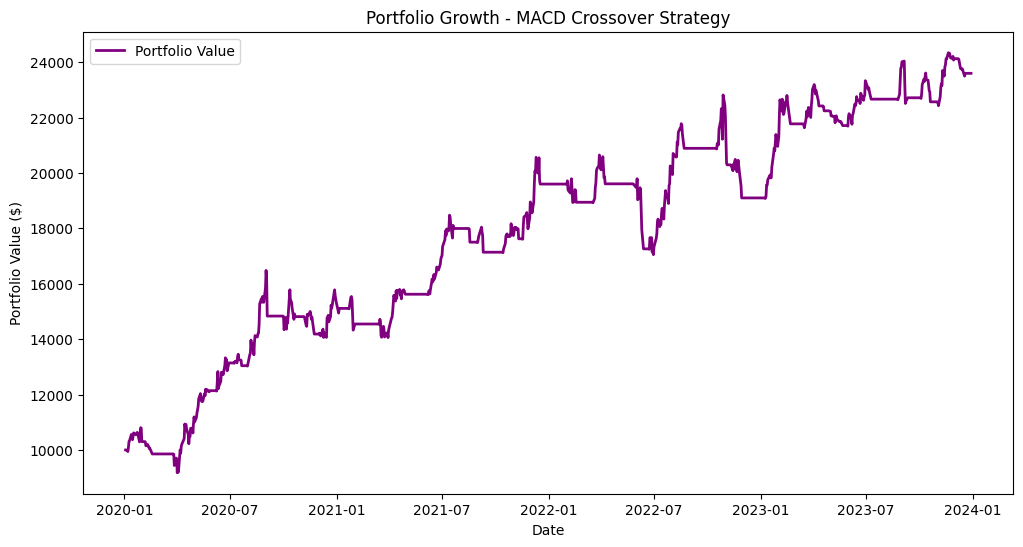

{'Strategy': 'MACD Crossover Strategy', 'Total Return': '135.99%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-17.42%', 'Win Rate': '51.35%', 'Total Trades': 37}


In [8]:
print("Running MACD Crossover Strategy...")
macd_results = backtester.macd_strategy()
print(macd_results)


### Breakout Trading Strategy

Running Breakout Trading Strategy...


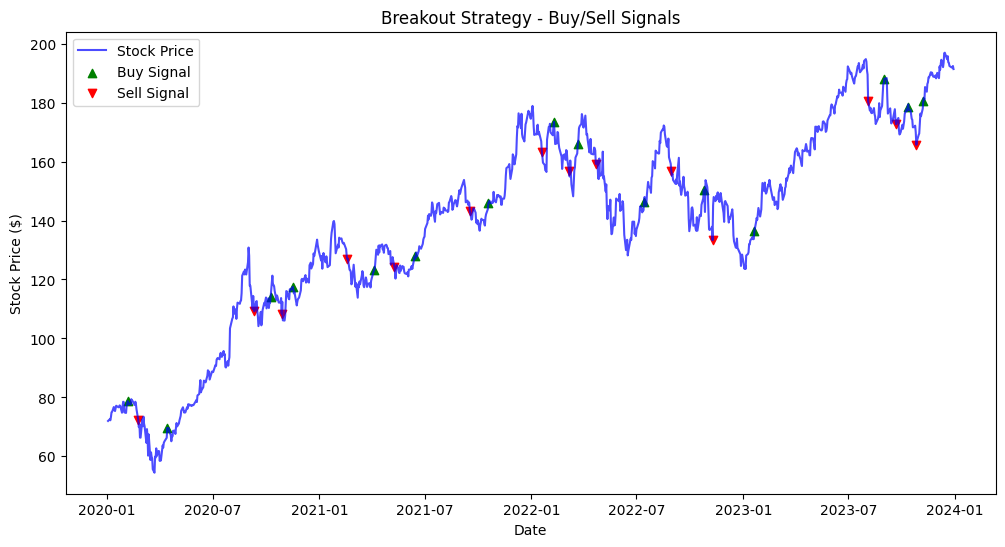

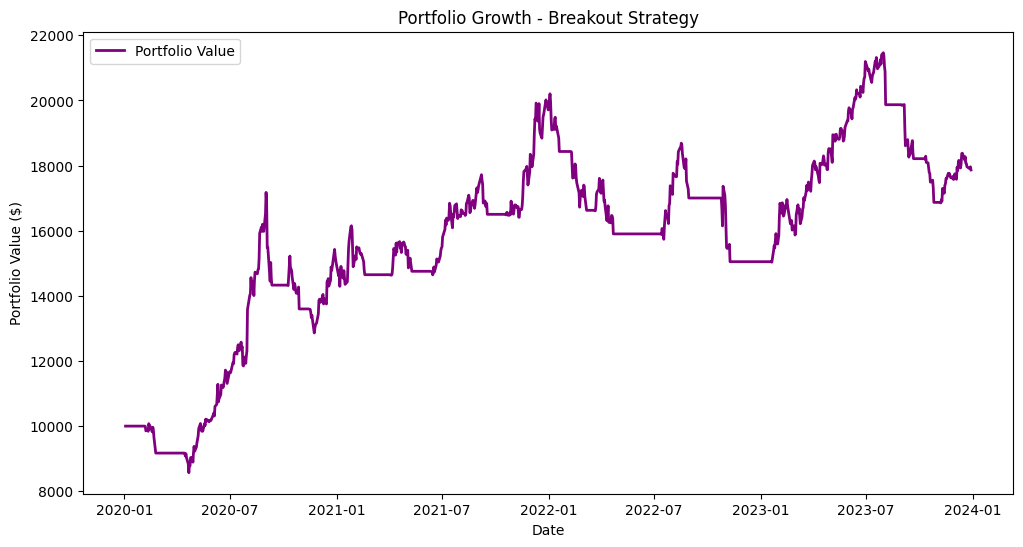

{'Strategy': 'Breakout Strategy', 'Total Return': '78.65%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-25.59%', 'Win Rate': '46.67%', 'Total Trades': 15}


In [9]:
print("Running Breakout Trading Strategy...")
breakout_results = backtester.breakout_strategy()
print(breakout_results)


### Mean Reversion Strategy

Running Mean Reversion Strategy...


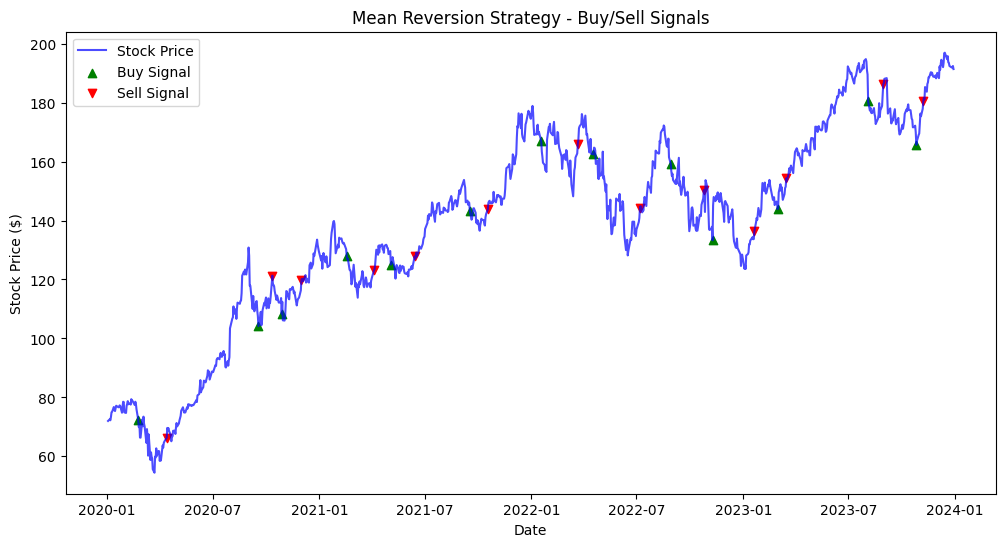

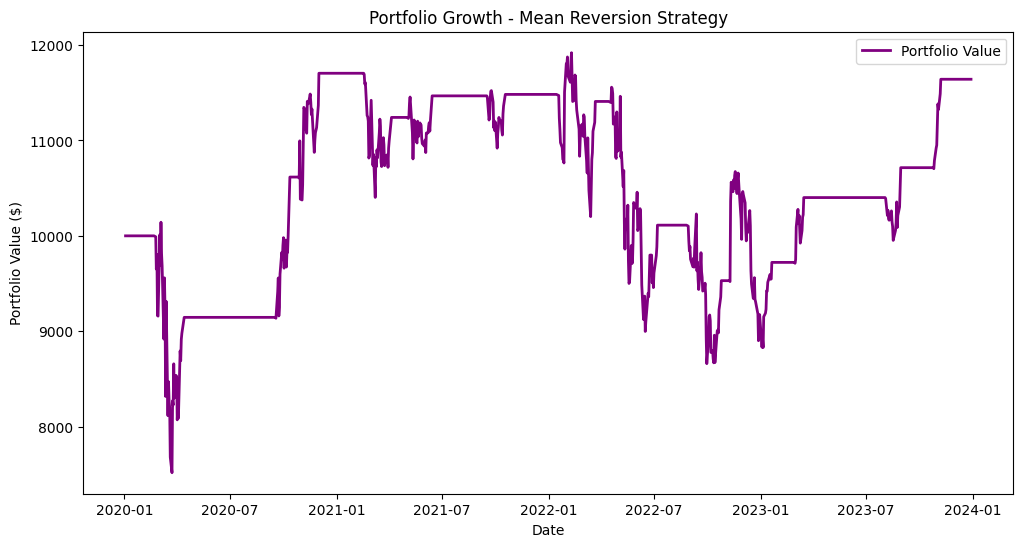

{'Strategy': 'Mean Reversion Strategy', 'Total Return': '16.41%', 'Sharpe Ratio': '0.89', 'Max Drawdown': '-27.33%', 'Win Rate': '61.54%', 'Total Trades': 13}


In [10]:
print("Running Mean Reversion Strategy...")
mean_reversion_results = backtester.mean_reversion_strategy()
print(mean_reversion_results)


## Performance Comparison Table

In [11]:
# Store all strategy results in a dictionary
strategies = {
    "Moving Average Crossover": ma_results,
    "RSI Strategy": rsi_results,
    "Bollinger Bands": bb_results,
    "MACD Crossover": macd_results,
    "Breakout Strategy": breakout_results,
    "Mean Reversion": mean_reversion_results
}

# Convert results to a Pandas DataFrame
results_df = pd.DataFrame(strategies).T

# Display the performance summary
print("📊 **Trading Strategy Performance Summary**")
results_df


📊 **Trading Strategy Performance Summary**


,Strategy,Total Return,Sharpe Ratio,Max Drawdown,Win Rate,Total Trades
Moving Average Crossover,Moving Average Crossover,64.68%,0.89,-30.89%,0.00%,1
RSI Strategy,RSI Strategy,3.39%,0.89,-29.59%,60.00%,10
Bollinger Bands,Bollinger Bands Strategy,37.27%,0.89,-25.88%,75.00%,12
MACD Crossover,MACD Crossover Strategy,135.99%,0.89,-17.42%,51.35%,37
Breakout Strategy,Breakout Strategy,78.65%,0.89,-25.59%,46.67%,15
Mean Reversion,Mean Reversion Strategy,16.41%,0.89,-27.33%,61.54%,13


## Monte Carlo Simulation

In [13]:
# import random
# import numpy as np
# def monte_carlo_simulation(strategy, num_simulations=100):
#     simulations = []

#     for _ in range(num_simulations):
#         backtester.data["Adj Close"] = backtester.data["Adj Close"] * (1 + np.random.uniform(-0.02, 0.02, len(backtester.data)))
#         results = strategy()
#         simulations.append(float(results["Total Return"].strip('%')) / 100)

#     plt.hist(simulations, bins=20, color="blue", alpha=0.7)
#     plt.title("Monte Carlo Simulation: Distribution of Total Returns")
#     plt.xlabel("Total Return")
#     plt.ylabel("Frequency")
#     plt.show()

# # Run Monte Carlo on RSI Strategy
# monte_carlo_simulation(backtester.rsi_strategy)
